<a href="https://colab.research.google.com/github/YonDraco/learn-deep-learning/blob/main/First_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Autoencoder

xây dựng bộ mã tự động đơn giản đầu tiên. Lấy dữ liệu ba chiều, mã hóa nó thành hai chiều và giải mã nó trở lại 3D.

## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Prepare and preview the dataset

Tạo một tập dữ liệu tổng hợp để hoạt động như đầu vào cho bộ mã tự động với hàm sau

In [2]:
def generate_data(m):
    '''vẽ m điểm ngẫu nhiên trên mặt phẳng 3D'''

    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
    
    return data

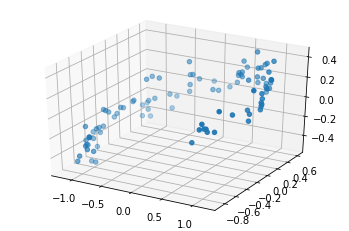

In [3]:
# sử dụng hàm trên để tạo các điểm dữ liệu
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

# Xem data
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds');

## Build the Model

Xây dựng mô hình bộ mã hóa-giải mã đơn giản. Lưu ý số lượng tế bào thần kinh trong mỗi lớp dày đặc. Mô hình sẽ thu gọn trong bộ mã hóa sau đó mở rộng trong bộ giải mã

In [4]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

autoencoder = keras.models.Sequential([encoder, decoder])

## Compile the Model

Cài đặt mô hình đào tạo

In [5]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

## Train the Model

Định cấu hình đào tạo để cùng sử dụng dữ liệu đầu vào làm đầu ra mục tiêu. Trong ví dụ này là `X_train`.

In [6]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 3s 6ms/step - loss: 0.8553
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4276
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3123
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2478
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2012
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1587
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1359
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1103
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0877
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0720
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0589
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0541
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

## Plot the encoder output

có thể sử dụng bộ mã hóa để nén đầu vào thành hai chiều

In [7]:
# encode data
codings = encoder.predict(X_train)

# xem cặp đầu ra bộ mã hóa đầu vào mẫu
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

input point: [ 0.85476759 -0.36243591  0.13109056]
encoded point: [0.33347297 0.64577544]


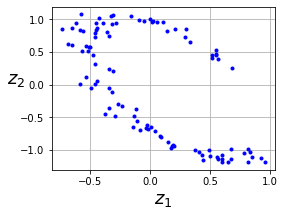

In [8]:
# vẽ tất cả các đầu ra của bộ mã hóa
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

## Plot the Decoder output

Bộ giải mã sau đó cố gắng tái tạo lại đầu vào ban đầu. Xem kết quả đầu ra bên dưới. Bạn sẽ thấy rằng mặc dù không hoàn hảo nhưng nó vẫn tuân theo hình dạng chung của đầu vào ban đầu.

In [9]:
# decode the encoder output
decodings = decoder.predict(codings)

# xem kết quả đầu ra mẫu cho một điểm duy nhất
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')

input point: [ 0.85476759 -0.36243591  0.13109056]
encoded point: [0.33347297 0.64577544]
decoded point: [ 0.8911751  -0.24201001  0.01188428]


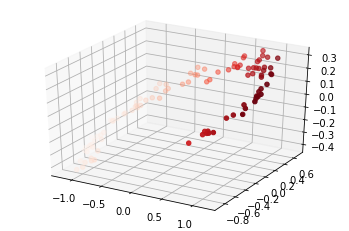

In [10]:
# vẽ đồ thị đầu ra của bộ giải mã
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');